In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



df=pd.read_csv("London DATA.csv")
df.shape

(3667, 17)

In [2]:
# Selecting rows from 9 th row
Hill_df = df.iloc[8:]

In [3]:
# Making 9 th row as header so as to retrieve data based on city names
Hill_df.columns = Hill_df.iloc[0]

In [4]:
# Removing 9 th row from the data as it is already there as the header
Hill_df = Hill_df[1:]

In [5]:
Hill_df = Hill_df[['Local Authority', 'Hillingdon']]


In [6]:
Hill_df.head()

8,Local Authority,Hillingdon,Hillingdon
9,Date,Nitrogen dioxide,Nitrogen dioxide
10,01/01/2014,20,42
11,02/01/2014,33,68
12,03/01/2014,25,53
13,04/01/2014,32,68


In [7]:
Hill_Industrial = Hill_df.iloc[ : , : 2]


In [8]:
temp_df = Hill_df.copy()
columns_to_drop = [1]
temp_df_dropped = temp_df.drop(temp_df.columns[columns_to_drop], axis=1)


subset_df = Hill_df.iloc[:, 2:]

# Concatenate the DataFrames
Hill_Urban = pd.concat([temp_df_dropped, subset_df], axis=1)

In [9]:
Hill_Urban.head()

8,Local Authority,Hillingdon
9,Date,Nitrogen dioxide
10,01/01/2014,42
11,02/01/2014,68
12,03/01/2014,53
13,04/01/2014,68


In [10]:
# Reset the header 
Hill_Industrial.columns = Hill_Industrial.iloc[0]

# Drop the now redundant header row
Hill_Industrial = Hill_Industrial[1:]

Hill_Industrial = Hill_Industrial.reset_index(drop=True)
Hill_Industrial.index = Hill_Industrial.index + 1



# Save the new dataset to a new CSV file (optional)
Hill_Industrial.to_csv('Hillington_Industrial_dataset.csv', index= False)




In [11]:
# Reset the header 
Hill_Urban.columns = Hill_Urban.iloc[0]

# Drop the now redundant header row
Hill_Urban = Hill_Urban[1:]

#Resetting the index
Hill_Urban = Hill_Urban.reset_index(drop=True)
Hill_Urban.index = Hill_Urban.index + 1



# Save the new dataset to a new CSV file (optional)
Hill_Urban.to_csv('Hill_Urban_dataset.csv', index= False)


In [12]:
Hill_Industrial.head()

9,Date,Nitrogen dioxide
1,01/01/2014,20
2,02/01/2014,33
3,03/01/2014,25
4,04/01/2014,32
5,05/01/2014,43


In [13]:
Hill_Urban.head()

9,Date,Nitrogen dioxide
1,01/01/2014,42
2,02/01/2014,68
3,03/01/2014,53
4,04/01/2014,68
5,05/01/2014,76


In [14]:
Hill_Industrial.isna().sum()

9
Date                 3
Nitrogen dioxide    25
dtype: int64

In [15]:
Hill_Urban.isna().sum()

9
Date                3
Nitrogen dioxide    4
dtype: int64

In [16]:
Hill_Industrial.dropna()

9,Date,Nitrogen dioxide
1,01/01/2014,20
2,02/01/2014,33
3,03/01/2014,25
4,04/01/2014,32
5,05/01/2014,43
...,...,...
3649,28/12/2023,19
3650,29/12/2023,12
3651,30/12/2023,24
3652,31/12/2023,17


In [17]:
Hill_Urban.dropna()

9,Date,Nitrogen dioxide
1,01/01/2014,42
2,02/01/2014,68
3,03/01/2014,53
4,04/01/2014,68
5,05/01/2014,76
...,...,...
3649,28/12/2023,13
3650,29/12/2023,17
3651,30/12/2023,24
3652,31/12/2023,15


In [18]:
Hill_Industrial = Hill_Industrial[Hill_Industrial['Nitrogen dioxide'] != 'No data']

In [19]:
Hill_Urban = Hill_Urban[Hill_Urban['Nitrogen dioxide'] != 'No data']

In [20]:
Hill_Industrial.tail()

9,Date,Nitrogen dioxide
3653,01/01/2024,25
3654,NaN,NaN
3655,NaN,NaN
3656,NaN,NaN
3657,End,NaN


In [21]:
Hill_Urban.tail()

9,Date,Nitrogen dioxide
3653,01/01/2024,24
3654,NaN,NaN
3655,NaN,NaN
3656,NaN,NaN
3657,End,NaN


In [22]:
Hill_Industrial =Hill_Industrial.iloc[ : -4]

In [23]:
Hill_Urban =Hill_Urban.iloc[ : -4]

In [24]:
Hill_Urban.tail()

9,Date,Nitrogen dioxide
3649,28/12/2023,13
3650,29/12/2023,17
3651,30/12/2023,24
3652,31/12/2023,15
3653,01/01/2024,24


In [25]:
Hill_Industrial["Nitrogen dioxide"].isnull().sum()

21

In [26]:
Hill_Industrial=Hill_Industrial.dropna()


In [27]:
Hill_Industrial["Nitrogen dioxide"].isnull().sum()

0

In [28]:
Hill_Industrial.shape

(3555, 2)

In [29]:
Hill_Urban.shape

(3568, 2)

In [30]:
#Type conversion
Hill_Industrial['Nitrogen dioxide'] = pd.to_numeric(Hill_Industrial['Nitrogen dioxide'], errors='coerce')
Hill_Urban['Nitrogen dioxide'] = pd.to_numeric(Hill_Urban['Nitrogen dioxide'], errors='coerce')

In [31]:
# Convert the 'Date' column to datetime format
Hill_Industrial['Date'] = pd.to_datetime(Hill_Industrial['Date'])
Hill_Urban['Date'] = pd.to_datetime(Hill_Urban['Date'])


### ANALYSING HILLINGTON INDUSTRIAL SITE 

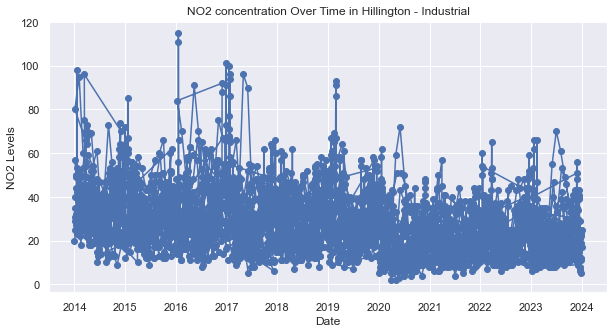

In [32]:

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(Hill_Industrial['Date'], Hill_Industrial['Nitrogen dioxide'], marker='o')
plt.title('NO2 concentration Over Time in Hillington - Industrial')
plt.xlabel('Date')
plt.ylabel('NO2 Levels')
plt.grid(True)
plt.show()

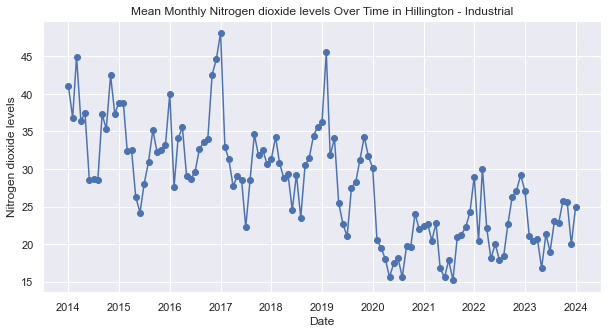

In [33]:
Hill_Industrial['YearMonth'] = Hill_Industrial['Date'].dt.to_period('M')

# Calculate mean NO2 levels for each month
monthly_mean_pollution = Hill_Industrial.groupby('YearMonth')['Nitrogen dioxide'].mean().reset_index()

# Convert 'YearMonth' to datetime format for plotting
monthly_mean_pollution['YearMonth'] = monthly_mean_pollution['YearMonth'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_mean_pollution['YearMonth'], monthly_mean_pollution['Nitrogen dioxide'], marker='o')
plt.title('Mean Monthly Nitrogen dioxide levels Over Time in Hillington - Industrial')
plt.xlabel('Date')
plt.ylabel('Nitrogen dioxide levels')
plt.grid(True)
plt.show()

In [34]:
# Stationary or Non Stationary checking 


Hill_Industrial['Year'] = Hill_Industrial['Date'].dt.year
Hill_Industrial['Month'] = Hill_Industrial['Date'].dt.month

# Group by 'Year' and 'Month' and calculate mean and variance for 'NO2 levels'
monthly_stats = Hill_Industrial.groupby(['Year', 'Month'])['Nitrogen dioxide'].agg(['mean', 'var']).reset_index()

# Display the result
print(monthly_stats)

     Year  Month       mean         var
0    2014      1  41.096774  258.890323
1    2014      2  36.821429  194.966931
2    2014      3  44.966667  355.136782
3    2014      4  36.448276  157.327586
4    2014      5  37.400000  113.696552
..    ...    ...        ...         ...
116  2023      9  22.800000   92.993103
117  2023     10  25.709677   71.412903
118  2023     11  25.600000  149.834483
119  2023     12  19.967742  116.098925
120  2024      1  25.000000         NaN

[121 rows x 4 columns]


In [35]:
monthly_stats['YearMonth'] = pd.to_datetime(monthly_stats[['Year', 'Month']].assign(DAY=1))
Hill_Industrial = monthly_stats.copy()
columns_to_keep = ['mean', 'YearMonth']
Hill_Industrial = Hill_Industrial[columns_to_keep]
Hill_Industrial = Hill_Industrial.rename(columns={'mean': 'Original NO2 levels'})
Hill_Industrial.head(10)

,Original NO2 levels,YearMonth
0,41.096774,2014-01-01
1,36.821429,2014-02-01
2,44.966667,2014-03-01
3,36.448276,2014-04-01
4,37.400000,2014-05-01
5,28.517241,2014-06-01
6,28.655172,2014-07-01
7,28.500000,2014-08-01
8,37.300000,2014-09-01
9,35.322581,2014-10-01


In [36]:
Hill_Industrial.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Original NO2 levels,121.0,28.067945,7.371644,15.225806,22.133333,28.517241,32.6,48.129032


In [37]:
Hill_Industrial['YearMonth'] = pd.to_datetime(Hill_Industrial['YearMonth'])
Hill_Industrial.set_index('YearMonth', inplace=True)
Hill_Industrial.head()

,Original NO2 levels
YearMonth,
2014-01-01,41.096774
2014-02-01,36.821429
2014-03-01,44.966667
2014-04-01,36.448276
2014-05-01,37.400000


Text(28.25, 0.5, 'Residual')

<Figure size 432x288 with 0 Axes>

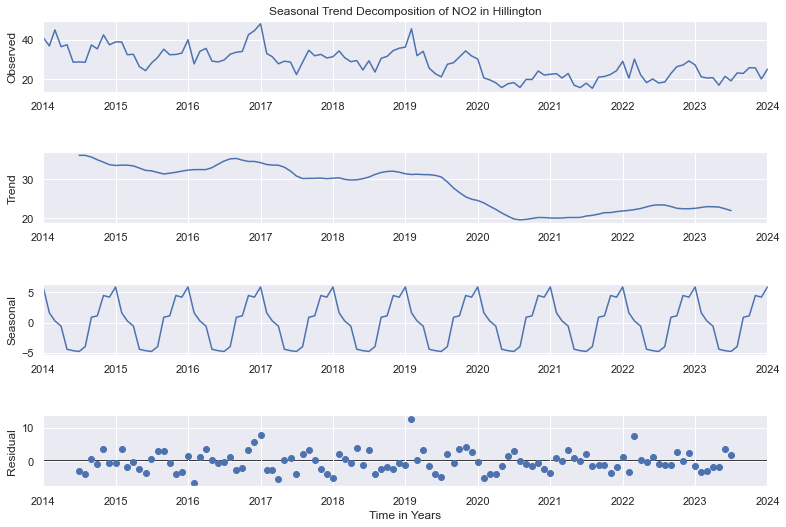

In [38]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Hill_Industrial['Original NO2 levels'])

fig=plt.figure()
fig=decomposition.plot()
fig.set_size_inches(12,8)

fig.axes[0].set_title('Seasonal Trend Decomposition of NO2 in Hillington')

fig.axes[0].set_ylabel('Observed')


fig.axes[1].set_ylabel('Trend')

fig.axes[2].set_ylabel('Seasonal')

fig.axes[3].set_xlabel('Time in Years')
fig.axes[3].set_ylabel('Residual')

In [39]:
# Augmented Dickey Fuller test (Hypothesis testing) using adfuller to prove whether the TS is stationary or non stationary

from statsmodels.tsa.stattools import adfuller 

def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series) #Hypothesis testing
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] < 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")
        
result = adf_check(Hill_Industrial['Original NO2 levels'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3198275695381836
p-value : 0.620053068023729
#Lags Used : 8
Number of Observations Used : 112
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [40]:
hill_df=Hill_Industrial.copy()
temp_res =adf_check(hill_df['Original NO2 levels'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3198275695381836
p-value : 0.620053068023729
#Lags Used : 8
Number of Observations Used : 112
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


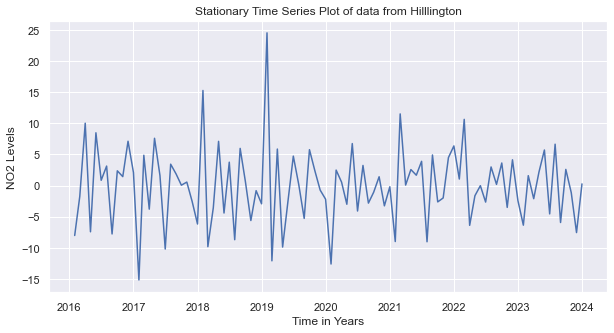

In [41]:
#To find the order of differencing 

#Here we have both seasonality and trend, so need to do both seasonal differencing and normal differencing

#SEASONAL DIFFERENCING ; dt = yt - yt-12

seasonality_removed = Hill_Industrial['Original NO2 levels'] - Hill_Industrial['Original NO2 levels'].shift(24) # second order seasonal diff

#NORMAL DIFFERENCING ; kt= dt - dt-1

trend_and_seasonality_removed = seasonality_removed - seasonality_removed.shift(1)

#DROPPING NAN VALUES

trend_and_seasonality_removed = trend_and_seasonality_removed.dropna()
plt.figure(figsize=(10, 5))

# Plotting the data
plt.plot(trend_and_seasonality_removed.index, trend_and_seasonality_removed, label='NO2 Levels')

# Adding title and labels
plt.title('Stationary Time Series Plot of data from Hilllington')
plt.xlabel('Time in Years')
plt.ylabel('NO2 Levels')

# Displaying the plot
plt.show()

In [42]:
result = adf_check(trend_and_seasonality_removed)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.459528554405397
p-value : 0.009089394124544629
#Lags Used : 8
Number of Observations Used : 87
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


We did 1st order normal differenicng and 2nd order seasonal differenicng
d=1 and D=2 

Text(28.25, 0.5, 'Residual')

<Figure size 432x288 with 0 Axes>

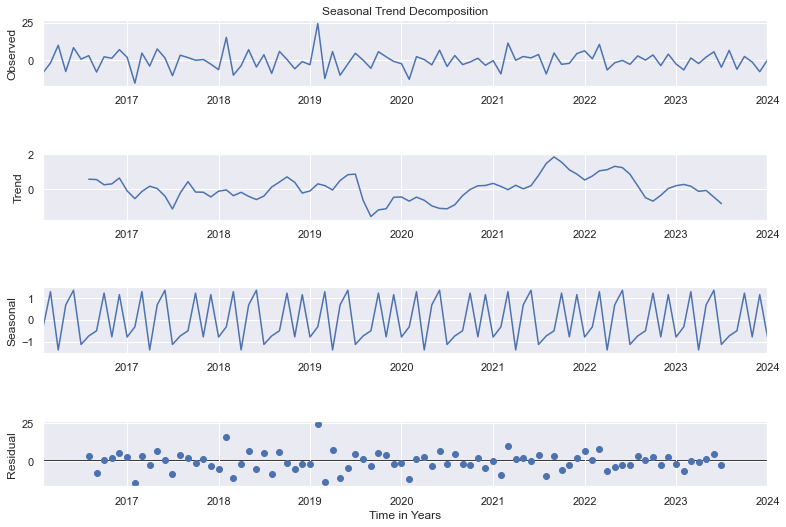

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(trend_and_seasonality_removed)

fig=plt.figure()
fig=decomposition.plot()
fig.set_size_inches(12,8)

fig.axes[0].set_title('Seasonal Trend Decomposition')

fig.axes[0].set_ylabel('Observed')


fig.axes[1].set_ylabel('Trend')

fig.axes[2].set_ylabel('Seasonal')

fig.axes[3].set_xlabel('Time in Years')
fig.axes[3].set_ylabel('Residual')

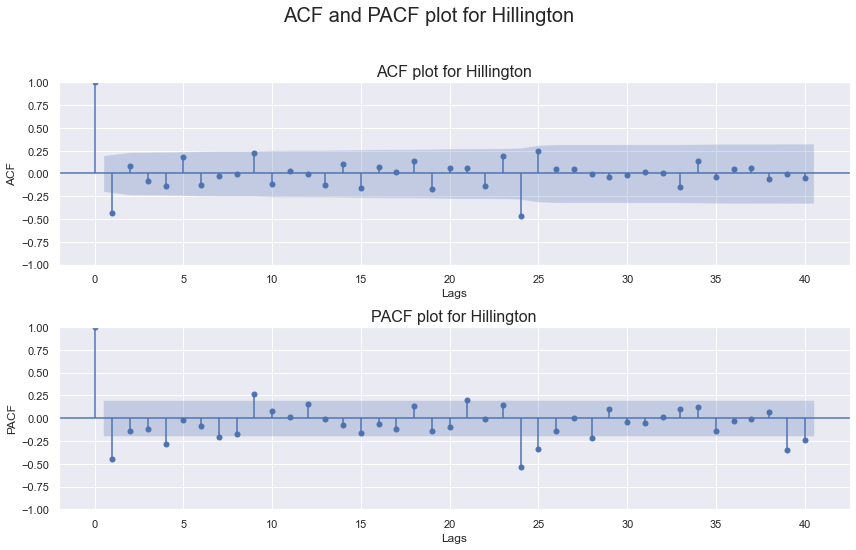

In [44]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create the figure and subplots
fig = plt.figure(figsize=(12, 8))

# ACF plot
ax1 = fig.add_subplot(211)
plot_acf(trend_and_seasonality_removed, lags=40, ax=ax1)
ax1.set_title("ACF plot for Hillington", fontsize=16)
ax1.set_xlabel("Lags")
ax1.set_ylabel("ACF")

# PACF plot
ax2 = fig.add_subplot(212)
plot_pacf(trend_and_seasonality_removed, lags=40, ax=ax2)
ax2.set_title("PACF plot for Hillington", fontsize=16)
ax2.set_xlabel("Lags")
ax2.set_ylabel("PACF")

# Overall title
fig.suptitle("ACF and PACF plot for Hillington", fontsize=20)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure with a higher resolution
#plt.savefig("ACF_PACF_Greenwich.png", dpi=300)

# Show the plot
plt.show()


The estimate of 
p= 1
q = 1
P = 2
Q = 2

Model = SARIMA(1,1,1)(2,2,2,12)

In [45]:
def rmse(series1, series2):
  error = series1-series2
  se_error = error**2
  rmse_ = np.sqrt(np.mean(se_error))
  return rmse_

In [46]:
def mape(actual, predicted):
  error = actual-predicted
  abs_error = np.absolute(error)
  percent_abs_error = (abs_error/actual)*100
  mape_ = np.mean(percent_abs_error)
  return mape_

In [47]:
# MODELLING

model =sm.tsa.statespace.SARIMAX(Hill_Industrial['Original NO2 levels'], 
                                order = (1,1,1),
                                seasonal_order = (2,2,2,12))

results= model.fit()
print(results.summary())
 
print('\n\n')
print('RMSE {}'.format(rmse(results.fittedvalues, Hill_Industrial['Original NO2 levels'])))
print('MAPE {}'.format(mape(Hill_Industrial['Original NO2 levels'], results.fittedvalues)))

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                     Original NO2 levels   No. Observations:                  121
Model:             SARIMAX(1, 1, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -302.206
Date:                                 Mon, 02 Sep 2024   AIC                            618.413
Time:                                         03:20:15   BIC                            636.363
Sample:                                     01-01-2014   HQIC                           625.669
                                          - 01-01-2024                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0879      0.199      0.442      0.659      -0.302       0

D:\Software\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'Original NO2 Levels and  Predicted Values of SARIMA(1,1,1)(3,1,0,12) Model')

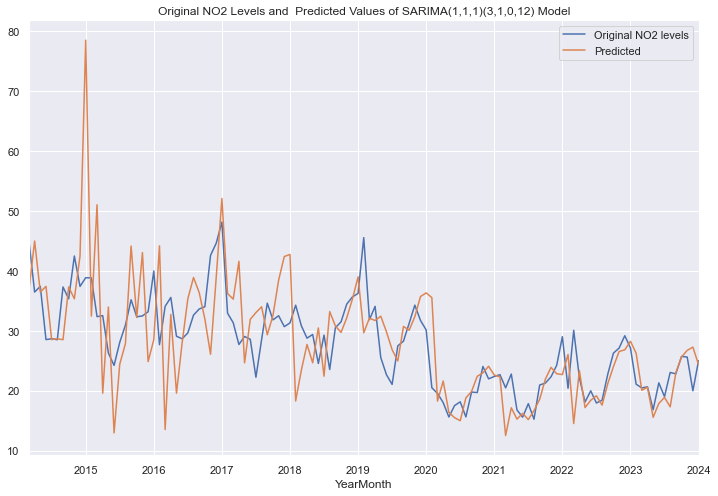

In [48]:
# Plotting predicted vs original

Hill_Industrial['Predicted'] = results.fittedvalues

temp_df = Hill_Industrial.iloc[2:, :]

temp_df[['Original NO2 levels', 'Predicted']].plot(figsize = (12, 8))
plt.title('Original NO2 Levels and  Predicted Values of SARIMA(1,1,1)(3,1,0,12) Model')


In [49]:
# Hyper parameter tuning 

import itertools
import warnings


p = range(1, 10) 
q= [1]
d = [1]

seasonal_p = [2]
seasonal_q = [2]
seasonal_d = [2] 
frequency=[12]

# Generate all different combinations of p, q and q triplets

pdq = list(itertools.product(p, d, q))  ####output = [(0,1,0), (0,1,1), (0,1,2)]

seasonal_pdq = list(itertools.product(seasonal_p, seasonal_d, seasonal_q, frequency))  ###output= [(0,1,0,12), (0,1,1,12)]


# Generate all different combinations of seasonal p, q and q triplets
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(range(0,4), range(1,3), range(0,3)))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Hill_Industrial['Original NO2 levels'],
                                            order=param,
                                            seasonal_order=param_seasonal)
                            

            results = mod.fit()

            print('SARIMA{}x{}12 - MAPE:{}'.format(param, param_seasonal, mape(Hill_Industrial['Original NO2 levels'], results.fittedvalues)))
           
        except:
            continue

SARIMA(1, 1, 1)x(2, 2, 2, 12)12 - MAPE:18.29152088395431
SARIMA(2, 1, 1)x(2, 2, 2, 12)12 - MAPE:18.150122672319313
SARIMA(3, 1, 1)x(2, 2, 2, 12)12 - MAPE:18.063495815295294
SARIMA(4, 1, 1)x(2, 2, 2, 12)12 - MAPE:18.136632215534696
SARIMA(5, 1, 1)x(2, 2, 2, 12)12 - MAPE:17.650090378011658
SARIMA(6, 1, 1)x(2, 2, 2, 12)12 - MAPE:18.332004848825008
SARIMA(7, 1, 1)x(2, 2, 2, 12)12 - MAPE:18.413486481721186
SARIMA(8, 1, 1)x(2, 2, 2, 12)12 - MAPE:18.26304966335869
SARIMA(9, 1, 1)x(2, 2, 2, 12)12 - MAPE:18.15428579391441


In [50]:
#Modelling using best values of p,q,P,Q - SARIMA((5, 1, 1), (2, 2, 2, 12))


best_model =sm.tsa.statespace.SARIMAX(Hill_Industrial['Original NO2 levels'], 
                                order = (5,1,1),
                                seasonal_order = (2,2,2,12))

best_result= best_model.fit()
print(best_result.summary())
 
print('\n\n')
print('RMSE {}'.format(rmse(best_result.fittedvalues, Hill_Industrial['Original NO2 levels'])))
print('MAPE {}'.format(mape(Hill_Industrial['Original NO2 levels'], best_result.fittedvalues)))

                                        SARIMAX Results                                        
Dep. Variable:                     Original NO2 levels   No. Observations:                  121
Model:             SARIMAX(5, 1, 1)x(2, 2, [1, 2], 12)   Log Likelihood                -299.639
Date:                                 Mon, 02 Sep 2024   AIC                            621.278
Time:                                         03:20:55   BIC                            649.486
Sample:                                     01-01-2014   HQIC                           632.680
                                          - 01-01-2024                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0282      0.572     -0.049      0.961      -1.149       1

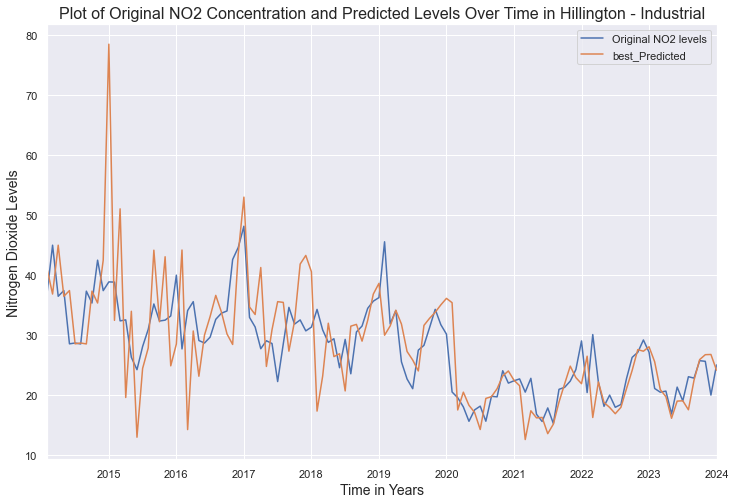

In [51]:
# comparing graphically original and predicted values graphically

import matplotlib.pyplot as plt

# Add the 'best_Predicted' values to the DataFrame
Hill_Industrial['best_Predicted'] = best_result.fittedvalues

# Drop the 'Predicted' column and remove the first row
temp_df1 = Hill_Industrial.drop('Predicted', axis=1)
temp_df1 = temp_df1.iloc[1:, :]

# Plot the original NO2 levels and the best predicted values
ax = temp_df1[['Original NO2 levels', 'best_Predicted']].plot(figsize=(12, 8))

# Add title and axes labels
ax.set_title('Plot of Original NO2 Concentration and Predicted Levels Over Time in Hillington - Industrial', fontsize=16)
ax.set_xlabel('Time in Years', fontsize=14)
ax.set_ylabel('Nitrogen Dioxide Levels', fontsize=14)

# Show the plot
plt.show()




In [52]:
# predict values using best_model
Hill_Industrial.head(20)

,Original NO2 levels,Predicted,best_Predicted
YearMonth,,,
2014-01-01,41.096774,0.000000,0.000000
2014-02-01,36.821429,41.096049,41.096028
2014-03-01,44.966667,36.821478,36.821751
2014-04-01,36.448276,44.966455,44.966298
2014-05-01,37.400000,36.448483,36.448366
2014-06-01,28.517241,37.399993,37.399968
2014-07-01,28.655172,28.517476,28.517441
2014-08-01,28.500000,28.655189,28.655177
2014-09-01,37.300000,28.500006,28.500178


In [53]:
# forecast values
print(best_result.forecast(24))

2024-02-01    20.977722
2024-03-01    20.800955
2024-04-01    21.104247
2024-05-01    15.274584
2024-06-01    18.657092
2024-07-01    17.049861
2024-08-01    16.779112
2024-09-01    19.181136
2024-10-01    22.814206
2024-11-01    23.525436
2024-12-01    22.961883
2025-01-01    23.939179
2025-02-01    20.239629
2025-03-01    19.505454
2025-04-01    19.178238
2025-05-01    13.697102
2025-06-01    18.090524
2025-07-01    16.418436
2025-08-01    16.151654
2025-09-01    18.063049
2025-10-01    22.302017
2025-11-01    22.452682
2025-12-01    21.844878
2026-01-01    22.670655
Freq: MS, Name: predicted_mean, dtype: float64


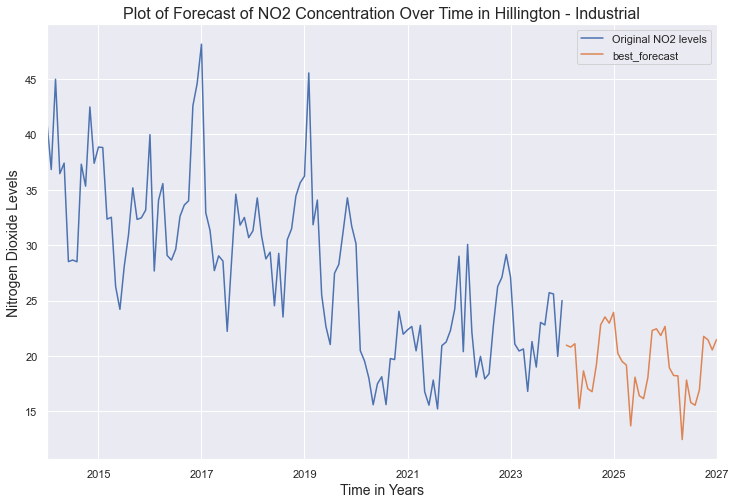

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Forecasting the next 36 values using the best model
forecasted_values = best_result.forecast(36)

# Concatenate the forecasted values to the original DataFrame
Hill_Industrial = pd.concat([Hill_Industrial, pd.DataFrame(forecasted_values, columns=['predicted_mean'])], axis=1)

# Rename the default column name from 'predicted_mean' to 'best_forecast'
Hill_Industrial.rename(columns={'predicted_mean': 'best_forecast'}, inplace=True)

# Plot the original NO2 levels and the best forecasted values
ax = Hill_Industrial[['Original NO2 levels', 'best_forecast']].plot(figsize=(12, 8))

# Add title and axes labels
ax.set_title('Plot of Forecast of NO2 Concentration Over Time in Hillington - Industrial', fontsize=16)
ax.set_xlabel('Time in Years', fontsize=14)
ax.set_ylabel('Nitrogen Dioxide Levels', fontsize=14)

# Show the plot
plt.show()




Initial Decline in NO2 Levels: The initial downward trend in NO2 levels indicates a reduction in pollution over time. This could be due to several factors such as the implementation of stricter environmental regulations, improvements in industrial processes, a decrease in industrial activity, or the adoption of cleaner technologies.

Stabilization of NO2 Levels: The subsequent constant level of NO2 pollution suggests that after a period of decline, the NO2 concentrations have reached a steady state. This means the factors that caused the reduction have either fully taken effect or the area has reached a new equilibrium in terms of pollution levels.

#### Possible Reasons for This Trend
Regulatory Measures:

##### Introduction of Emission Controls: Implementation of stricter emission standards and pollution controls can significantly reduce NO2 levels. 
Compliance and Monitoring: Continuous monitoring and enforcement of environmental regulations ensure that industries comply, leading to sustained lower levels of pollution.
Technological Advancements:

##### Adoption of Cleaner Technologies: Transition to cleaner production technologies and energy sources can reduce NO2 emissions
Process Optimization: Improvements in industrial processes that reduce waste and emissions contribute to the initial decline and eventual stabilization.
Economic Factors:

##### Reduced Industrial Activity: Economic downturns or shifts in the industrial base can lead to reduced production and hence lower NO2 emissions. 
Sustainable Practices: Shift towards more sustainable and environmentally friendly practices in the industrial sector can reduce pollution over time.
External Interventions:

##### Government Policies: Effective policies and initiatives aimed at reducing pollution can lead to an initial decline followed by stabilization.
Community and Environmental Advocacy: Increased awareness and advocacy for cleaner environments can pressure industries to adopt better practices.

#### Implications

Positive Environmental Impact: The initial decline in NO2 levels indicates successful efforts in reducing pollution, which is beneficial for public health and the environment.

Need for Continuous Monitoring: Even with stabilization, continuous monitoring is essential to ensure that NO2 levels do not rise again and to identify any emerging sources of pollution.

Long-term Sustainability: Maintaining the constant level requires ongoing commitment to environmental regulations, technological advancements, and sustainable industrial practices.

#### Conclusion
The observed trend in NO2 levels in the Hillington industrial area, characterized by an initial decline followed by stabilization, suggests successful mitigation efforts that have led to a new steady state of lower pollution levels. This outcome highlights the importance of sustained regulatory, technological, and community efforts in achieving and maintaining cleaner air quality.

In [55]:

hill_df.head()
hill_df=hill_df[["Original NO2 levels"]]

In [56]:
hill_df.head()

,Original NO2 levels
YearMonth,
2014-01-01,41.096774
2014-02-01,36.821429
2014-03-01,44.966667
2014-04-01,36.448276
2014-05-01,37.400000


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming hill_df is already loaded
# Split the data into train and test sets
df_train, df_test = train_test_split(hill_df, test_size=0.2, shuffle=False)

# Fit SARIMAX model on train data
model = SARIMAX(df_train['Original NO2 levels'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

# Forecast for the next 24 months
forecast_periods = 24  # Next 24 months

future_forecast = model_fit.forecast(steps=forecast_periods)



# Display the forecasted data
print(future_forecast)






2022-01-01    25.764662
2022-02-01    21.023946
2022-03-01    18.022315
2022-04-01    16.834843
2022-05-01    13.657608
2022-06-01    11.896362
2022-07-01    12.038844
2022-08-01    14.189698
2022-09-01    18.038307
2022-10-01    17.673555
2022-11-01    21.368344
2022-12-01    20.479330
2023-01-01    22.075773
2023-02-01    18.700022
2023-03-01    15.914618
2023-04-01    15.633093
2023-05-01    11.725749
2023-06-01    10.108173
2023-07-01    10.800203
2023-08-01    11.718177
2023-09-01    16.049008
2023-10-01    15.863115
2023-11-01    18.869727
2023-12-01    18.710905
Freq: MS, Name: predicted_mean, dtype: float64


In [66]:
print(df_test)

            Original NO2 levels
YearMonth                      
2022-01-01            29.000000
2022-02-01            20.392857
2022-03-01            30.064516
2022-04-01            22.133333
2022-05-01            18.096774
2022-06-01            19.966667
2022-07-01            17.935484
2022-08-01            18.400000
2022-09-01            22.733333
2022-10-01            26.258065
2022-11-01            27.100000
2022-12-01            29.161290
2023-01-01            27.129032
2023-02-01            21.071429
2023-03-01            20.451613
2023-04-01            20.633333
2023-05-01            16.806452
2023-06-01            21.300000
2023-07-01            19.000000
2023-08-01            23.032258
2023-09-01            22.800000
2023-10-01            25.709677
2023-11-01            25.600000
2023-12-01            19.967742
2024-01-01            25.000000


In [67]:
df_test  = df_test.iloc[:-1]

In [68]:
print(df_test)

            Original NO2 levels
YearMonth                      
2022-01-01            29.000000
2022-02-01            20.392857
2022-03-01            30.064516
2022-04-01            22.133333
2022-05-01            18.096774
2022-06-01            19.966667
2022-07-01            17.935484
2022-08-01            18.400000
2022-09-01            22.733333
2022-10-01            26.258065
2022-11-01            27.100000
2022-12-01            29.161290
2023-01-01            27.129032
2023-02-01            21.071429
2023-03-01            20.451613
2023-04-01            20.633333
2023-05-01            16.806452
2023-06-01            21.300000
2023-07-01            19.000000
2023-08-01            23.032258
2023-09-01            22.800000
2023-10-01            25.709677
2023-11-01            25.600000
2023-12-01            19.967742


In [69]:
df_combined1 = pd.concat([df_train, df_test])
df_combined2 =  pd.concat([df_train, pd.DataFrame(future_forecast)], axis=1)



In [73]:
df_combined2.tail()

,Original NO2 levels,predicted_mean
2023-08-01,NaN,11.718177
2023-09-01,NaN,16.049008
2023-10-01,NaN,15.863115
2023-11-01,NaN,18.869727
2023-12-01,NaN,18.710905


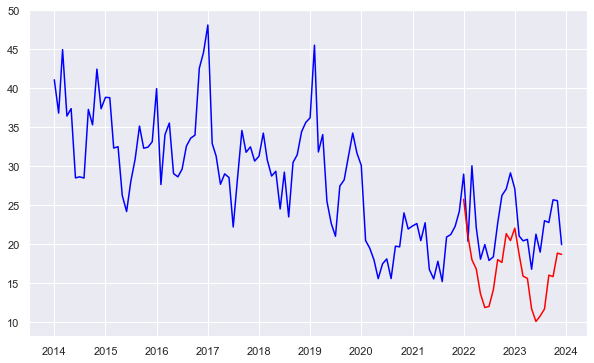

In [75]:
plt.figure(figsize=(10, 6))

# Plot df_combined1
plt.plot(df_combined1.index, df_combined1['Original NO2 levels'], label='Original NO2 levels - df_combined1', color='blue')




# Plot df_combined2
plt.plot(df_combined2.index, df_combined2['predicted_mean'], label='Original NO2 levels - df_combined2', color='red')




# Add title and axes labels
ax.set_title('Plot of Forecast on Train data of NO2 Concentration Over Time in Hillington - Industrial', fontsize=16)
ax.set_xlabel('Time in Years', fontsize=14)
ax.set_ylabel('Nitrogen Dioxide Levels', fontsize=14)

# Show the plot
plt.show()


#plot.set_title('xyz')
#plot.set_xlabel('Time (Years)')
#plot.set_ylabel('NO2 Levels')

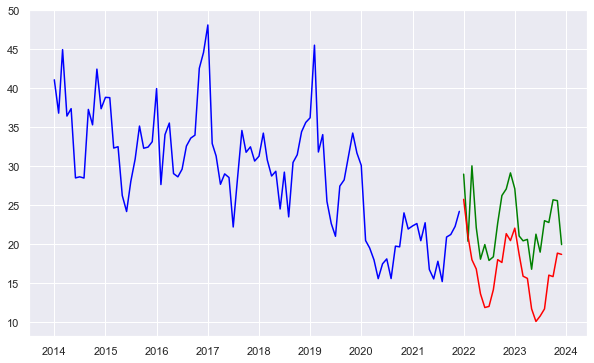

In [77]:
plt.figure(figsize=(10, 6))


plt.plot(df_train.index, df_train['Original NO2 levels'], label='Original NO2 levels(train_)', color='blue')

plt.plot(df_test.index, df_test['Original NO2 levels'], label='Original NO2 levels(test)', color='green')


# Plot df_combined2
plt.plot(df_combined2.index, df_combined2['predicted_mean'], label='Original NO2 levels - df_combined2', color='red')




# Add title and axes labels
ax.set_title('Plot of Forecast on Train data of NO2 Concentration Over Time in Hillington - Industrial', fontsize=16)
ax.set_xlabel('Time in Years', fontsize=14)
ax.set_ylabel('Nitrogen Dioxide Levels', fontsize=14)

# Show the plot
plt.show()


#plot.set_title('xyz')
#plot.set_xlabel('Time (Years)')
#plot.set_ylabel('NO2 Levels')